In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime
import warnings


In [5]:
df = pd.read_csv("HomeC2.csv")
df.head()

,time,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,...,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,month,day,weekday,hour,minute
0,2016-01-01 14:00:00,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,...,0.75,282.0,0.0,24.4,0.0,1,1,Friday,14,0
1,2016-01-01 14:01:00,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,...,0.75,282.0,0.0,24.4,0.0,1,1,Friday,14,1
2,2016-01-01 14:02:00,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,...,0.75,282.0,0.0,24.4,0.0,1,1,Friday,14,2
3,2016-01-01 14:03:00,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,...,0.75,282.0,0.0,24.4,0.0,1,1,Friday,14,3
4,2016-01-01 14:04:00,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,...,0.75,282.0,0.0,24.4,0.0,1,1,Friday,14,4


In [6]:
df.columns

Index(['time', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Furnace', 'Kitchen', 'Solar', 'temperature', 'humidity',
       'visibility', 'apparentTemperature', 'pressure', 'windSpeed',
       'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint',
       'precipProbability', 'month', 'day', 'weekday', 'hour', 'minute'],
      dtype='object')

In [7]:
df.tail()

,time,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,...,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,month,day,weekday,hour,minute
503905,2016-12-16 12:25:00,1.601233,0.000050,0.041783,0.005267,0.008667,0.013483,0.032283,0.000983,0.003800,...,0.31,186.0,0.0101,31.27,0.51,12,16,Friday,12,25
503906,2016-12-16 12:26:00,1.599333,0.000050,0.041750,0.005233,0.008433,0.013433,0.032200,0.000950,0.003800,...,0.31,186.0,0.0101,31.27,0.51,12,16,Friday,12,26
503907,2016-12-16 12:27:00,1.924267,0.000033,0.042033,0.004983,0.008467,0.012933,0.032283,0.001000,0.003750,...,0.31,186.0,0.0101,31.27,0.51,12,16,Friday,12,27
503908,2016-12-16 12:28:00,1.978200,0.000050,0.042100,0.005333,0.008233,0.012817,0.032183,0.000950,0.003767,...,0.31,186.0,0.0101,31.27,0.51,12,16,Friday,12,28
503909,2016-12-16 12:29:00,1.990950,0.000050,0.042100,0.004917,0.008133,0.012833,0.032167,0.000950,0.003767,...,0.31,186.0,0.0101,31.27,0.51,12,16,Friday,12,29


In [8]:
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')
df.head(2)

,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,...,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,month,day,weekday,hour,minute
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 14:00:00,0.932833,0.000033,0.442633,0.12415,0.006983,0.013083,0.03135,0.001017,0.004067,0.001517,...,0.75,282.0,0.0,24.4,0.0,1,1,Friday,14,0
2016-01-01 14:01:00,0.934333,0.000000,0.444067,0.12400,0.006983,0.013117,0.03150,0.001017,0.004067,0.001650,...,0.75,282.0,0.0,24.4,0.0,1,1,Friday,14,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 14:00:00 to 2016-12-16 12:29:00
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   House overall        503910 non-null  float64
 1   Dishwasher           503910 non-null  float64
 2   Home office          503910 non-null  float64
 3   Fridge               503910 non-null  float64
 4   Wine cellar          503910 non-null  float64
 5   Garage door          503910 non-null  float64
 6   Barn                 503910 non-null  float64
 7   Well                 503910 non-null  float64
 8   Microwave            503910 non-null  float64
 9   Living room          503910 non-null  float64
 10  Furnace              503910 non-null  float64
 11  Kitchen              503910 non-null  float64
 12  Solar                503910 non-null  float64
 13  temperature          503910 non-null  float64
 14  humidity             503910 non-nu

In [10]:
df.columns

Index(['House overall', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar',
       'Garage door', 'Barn', 'Well', 'Microwave', 'Living room', 'Furnace',
       'Kitchen', 'Solar', 'temperature', 'humidity', 'visibility',
       'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'month', 'day', 'weekday', 'hour', 'minute'],
      dtype='object')

In [11]:
data = df[['House overall', 'temperature', 'humidity',
       'visibility', 'apparentTemperature', 'pressure', 'windSpeed',
       'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint',
       'precipProbability']]

In [12]:
warnings.filterwarnings('ignore')

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
data[data.columns[1:]] = scaler.fit_transform(data[data.columns[1:]])

In [14]:
scaler_target = MinMaxScaler(feature_range=(0, 1))
data[['House overall']] = scaler_target.fit_transform(data[['House overall']])

In [15]:
size = int(len(df.loc[:'2016-11-1 00:00']))

In [16]:
data_train = data[:size]
data_test = data[size:]
X_train, X_test = [], []
Y_train, Y_test = [], []
n_past=1
n_future=1
for i in range(n_past, len(data_train)-n_future+1):
    X_train.append(data_train.iloc[i-n_past:i, 0:data.shape[1]])
    Y_train.append(data_train.iloc[i+n_future-1:i+n_future, 0])
for i in range(n_past, len(data_test)-n_future+1):
    X_test.append(data_test.iloc[i-n_past:i, 0:data_test.shape[1]])
    Y_test.append(data_test.iloc[i+n_future-1:i+n_future, 0])
    
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test, Y_test = np.array(X_test), np.array(Y_test)

In [17]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('Y_train shape', Y_train.shape)
print('Y_test shape', Y_test.shape)

X_train shape (438360, 1, 12)
X_test shape (65548, 1, 12)
Y_train shape (438360, 1)
Y_test shape (65548, 1)


In [18]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Bidirectional

In [19]:
model = Sequential()
model.add(LSTM(25, activation='relu', return_sequences = False, input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(Dropout(0.2))
model.add(Dense(Y_train.shape[1]))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 25)                3800      
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 3,826
Trainable params: 3,826
Non-trainable params: 0
_________________________________________________________________


2023-01-17 08:07:29.043269: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-17 08:07:29.492290: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22247 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/20
   84/13699 [..............................] - ETA: 24s - loss: 0.0109

2023-01-17 08:07:31.021913: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


13699/13699 [==============================] - 26s 2ms/step - loss: 9.4828e-04
Epoch 2/20
13699/13699 [==============================] - 25s 2ms/step - loss: 8.1790e-04
Epoch 3/20
13699/13699 [==============================] - 25s 2ms/step - loss: 8.0987e-04
Epoch 4/20
13699/13699 [==============================] - 25s 2ms/step - loss: 8.0638e-04
Epoch 5/20
13699/13699 [==============================] - 25s 2ms/step - loss: 8.0537e-04
Epoch 6/20
13699/13699 [==============================] - 25s 2ms/step - loss: 8.0363e-04
Epoch 7/20
13699/13699 [==============================] - 25s 2ms/step - loss: 8.0153e-04
Epoch 8/20
13699/13699 [==============================] - 25s 2ms/step - loss: 8.0114e-04
Epoch 9/20
13699/13699 [==============================] - 25s 2ms/step - loss: 7.9996e-04
Epoch 10/20
13699/13699 [==============================] - 25s 2ms/step - loss: 7.9941e-04
Epoch 11/20
13699/13699 [==============================] - 25s 2ms/step - loss: 7.9968e-04
Epoch 12/20
13699/1

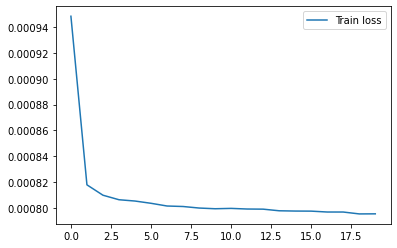

In [20]:
model_fit = model.fit(X_train, Y_train, epochs=20)
Train_pred = model.predict(X_train, verbose=0)
Y_pred = model.predict(X_test, verbose=0)
plt.plot(model_fit.history['loss'], label='Train loss')
#plt.plot(model_fit.history['val_loss'], label='Validation loss')
plt.legend()
print('Train MSE minimum:', min(model_fit.history['loss']))
#print('Validation MSE minimum:', min(model_fit.history['val_loss']))

In [21]:
data[['House overall']] = scaler_target.inverse_transform(data[['House overall']])
Y_pred = scaler_target.inverse_transform(Y_pred)
Train_pred = scaler_target.inverse_transform(Train_pred)

0.10505627136561435

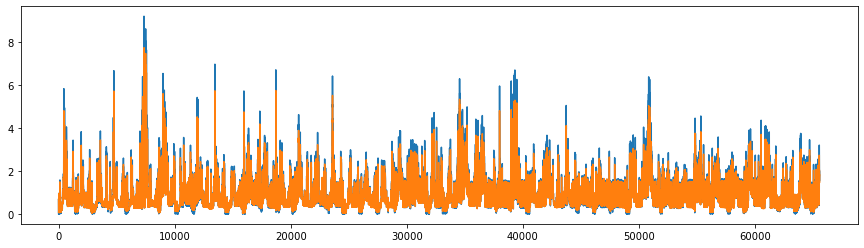

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
plt.figure(figsize=(15,4))
plt.plot(data[['House overall']][size:-1].values)
plt.plot(Y_pred)
np.sqrt(mean_squared_error(Y_pred[:,0].tolist(), data[['House overall']][size:-1].values))

MSE: 0.01104
RMSE: 0.10506
MAE: 0.049
R^2 score: 0.977


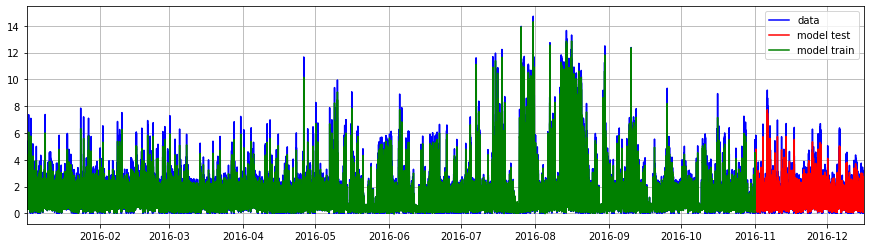

In [37]:
Y_pred_series = pd.Series(Y_pred.flatten().tolist(), index=data['House overall'][size:-n_past].index)
Train_pred_series = pd.Series(Train_pred.flatten().tolist(), index=data['House overall'][n_past:size].index)
plt.figure(figsize=(15,4))
plt.plot(data['House overall'][:-n_past], c='blue', label='data')
plt.plot(Y_pred_series, c='red', label='model test')
plt.plot(Train_pred_series, c='green', label='model train')
plt.legend()
plt.grid(), plt.margins(x=0);
Y_test = data['House overall'][size:-n_past]

# calcolo errore
print('MSE: %.5f' % (mean_squared_error(Y_pred, Y_test)))
print('RMSE: %.5f' % np.sqrt(mean_squared_error(Y_pred, Y_test)))
MAE = mean_absolute_error(Y_test, Y_pred)
print('MAE: %.3f' % MAE)
print('R^2 score: %.3f' % r2_score(Y_test, Y_pred))

In [38]:
a=sum(Y_pred[:,0])

In [39]:
b=sum(np.abs(Y_test.values))

In [42]:
b

56938.10826671607

In [44]:
mape = np.abs(a-b)/b
mape

0.024237577365278512

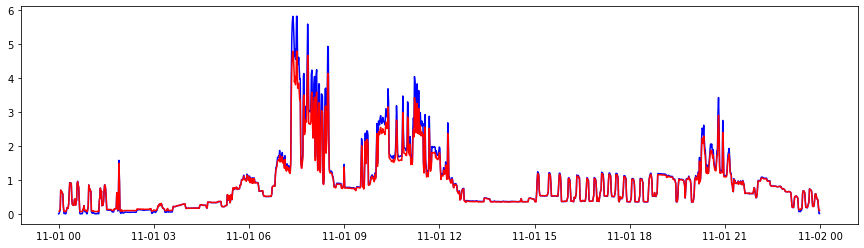

In [26]:
d1 = plt.figure(figsize=(15,4))
plt.plot(data['House overall']['2016-11-1'], c='blue', label='data')
plt.plot(Y_pred_series['2016-11-1'], c='red', label='model test')

In [27]:
df

,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,...,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,month,day,weekday,hour,minute
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 14:00:00,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,...,0.75,282.0,0.0000,24.40,0.00,1,1,Friday,14,0
2016-01-01 14:01:00,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,...,0.75,282.0,0.0000,24.40,0.00,1,1,Friday,14,1
2016-01-01 14:02:00,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,...,0.75,282.0,0.0000,24.40,0.00,1,1,Friday,14,2
2016-01-01 14:03:00,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,...,0.75,282.0,0.0000,24.40,0.00,1,1,Friday,14,3
2016-01-01 14:04:00,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,...,0.75,282.0,0.0000,24.40,0.00,1,1,Friday,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-16 12:25:00,1.601233,0.000050,0.041783,0.005267,0.008667,0.013483,0.032283,0.000983,0.003800,0.000967,...,0.31,186.0,0.0101,31.27,0.51,12,16,Friday,12,25
2016-12-16 12:26:00,1.599333,0.000050,0.041750,0.005233,0.008433,0.013433,0.032200,0.000950,0.003800,0.000933,...,0.31,186.0,0.0101,31.27,0.51,12,16,Friday,12,26
2016-12-16 12:27:00,1.924267,0.000033,0.042033,0.004983,0.008467,0.012933,0.032283,0.001000,0.003750,0.001000,...,0.31,186.0,0.0101,31.27,0.51,12,16,Friday,12,27


In [28]:
Y_pred_series['2016-11-1']

time
2016-11-01 00:01:00    0.076119
2016-11-01 00:02:00    0.107392
2016-11-01 00:03:00    0.136488
2016-11-01 00:04:00    0.702329
2016-11-01 00:05:00    0.670530
                         ...   
2016-11-01 23:55:00    0.434365
2016-11-01 23:56:00    0.410934
2016-11-01 23:57:00    0.198151
2016-11-01 23:58:00    0.099483
2016-11-01 23:59:00    0.100721
Length: 1439, dtype: float64

In [26]:
a = Y_pred_series['2016-11-1 07:00': '2016-11-1 12:00']

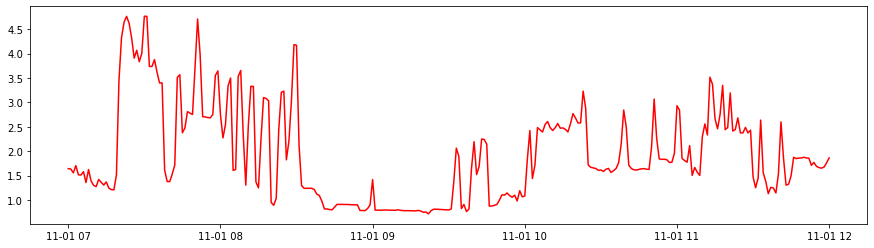

In [76]:
plt.figure(figsize=(15,4))
plt.plot(a, c='red', label='model test')

In [77]:
df_r = data['House overall']['2016-11']

In [29]:
df_r = pd.DataFrame({"real":df_r})

In [30]:
df_p = Y_pred_series['2016-11']

In [31]:
df_p = pd.DataFrame({"predict":df_p})

In [32]:
df_t = pd.merge(df_r, df_p, how='inner', on='time')

In [33]:
df_t

,real,predict
time,,
2016-11-01 00:01:00,0.013283,0.050851
2016-11-01 00:02:00,0.068133,0.102575
2016-11-01 00:03:00,0.118167,0.154763
2016-11-01 00:04:00,0.699050,0.727142
2016-11-01 00:05:00,0.666250,0.696346
...,...,...
2016-11-30 23:55:00,0.947467,0.964025
2016-11-30 23:56:00,0.949917,0.966224
2016-11-30 23:57:00,0.925950,0.944675


In [34]:
df_t.to_csv('HomeC_work.csv', index=False)

In [35]:
df_t['month'] = df_t.index.month
df_t['day'] = df_t.index.day
df_t['weekday'] = df_t.index.day_name()
df_t['hour'] = df_t.index.hour
df_t['minute'] = df_t.index.minute
df_t.tail(2)

,real,predict,month,day,weekday,hour,minute
time,,,,,,,
2016-11-30 23:58:00,0.918600,0.938050,11,30,Wednesday,23,58
2016-11-30 23:59:00,0.827517,0.855275,11,30,Wednesday,23,59


In [36]:
len(df_t)

43199

In [37]:
df_t.head()

,real,predict,month,day,weekday,hour,minute
time,,,,,,,
2016-11-01 00:01:00,0.013283,0.050851,11,1,Tuesday,0,1
2016-11-01 00:02:00,0.068133,0.102575,11,1,Tuesday,0,2
2016-11-01 00:03:00,0.118167,0.154763,11,1,Tuesday,0,3
2016-11-01 00:04:00,0.699050,0.727142,11,1,Tuesday,0,4
2016-11-01 00:05:00,0.666250,0.696346,11,1,Tuesday,0,5


In [38]:
# low = [22,23,0,1,2,3,4,5,6,3]
# mid = [8,9,10,11,12,13,14,15]
# high = [16,17,18,19,20,21]
sw = [1,2,6,7,8,11,12]
sf = [3,4,5,9,10]
low = [13,14,15,16,17,18,19,20,21,22]
mid = [23,0,1,2,3,4,5,6]
high = [7,8,9,10,11,12]

In [39]:
df1 = df_t[df_t['hour'].isin(low)]
df1['fare'] = 107.0
df1

,real,predict,month,day,weekday,hour,minute,fare
time,,,,,,,,
2016-11-01 13:00:00,0.378283,0.402139,11,1,Tuesday,13,0,107.0
2016-11-01 13:01:00,0.379450,0.403282,11,1,Tuesday,13,1,107.0
2016-11-01 13:02:00,0.374117,0.398054,11,1,Tuesday,13,2,107.0
2016-11-01 13:03:00,0.383217,0.406972,11,1,Tuesday,13,3,107.0
2016-11-01 13:04:00,0.377083,0.400963,11,1,Tuesday,13,4,107.0
...,...,...,...,...,...,...,...,...
2016-11-30 22:55:00,0.314483,0.364974,11,30,Wednesday,22,55,107.0
2016-11-30 22:56:00,0.312100,0.362593,11,30,Wednesday,22,56,107.0
2016-11-30 22:57:00,0.313083,0.363575,11,30,Wednesday,22,57,107.0


In [40]:
df2 = df_t[df_t['hour'].isin(mid)]
df2['fare'] = 153.0
df2

,real,predict,month,day,weekday,hour,minute,fare
time,,,,,,,,
2016-11-01 00:01:00,0.013283,0.050851,11,1,Tuesday,0,1,153.0
2016-11-01 00:02:00,0.068133,0.102575,11,1,Tuesday,0,2,153.0
2016-11-01 00:03:00,0.118167,0.154763,11,1,Tuesday,0,3,153.0
2016-11-01 00:04:00,0.699050,0.727142,11,1,Tuesday,0,4,153.0
2016-11-01 00:05:00,0.666250,0.696346,11,1,Tuesday,0,5,153.0
...,...,...,...,...,...,...,...,...
2016-11-30 23:55:00,0.947467,0.964025,11,30,Wednesday,23,55,153.0
2016-11-30 23:56:00,0.949917,0.966224,11,30,Wednesday,23,56,153.0
2016-11-30 23:57:00,0.925950,0.944675,11,30,Wednesday,23,57,153.0


In [41]:
df3 = df_t[df_t['hour'].isin(high)]
df3['fare'] = 188.8
df3

,real,predict,month,day,weekday,hour,minute,fare
time,,,,,,,,
2016-11-01 07:00:00,1.737450,1.617966,11,1,Tuesday,7,0,188.8
2016-11-01 07:01:00,1.729317,1.611375,11,1,Tuesday,7,1,188.8
2016-11-01 07:02:00,1.636267,1.535552,11,1,Tuesday,7,2,188.8
2016-11-01 07:03:00,1.811750,1.677903,11,1,Tuesday,7,3,188.8
2016-11-01 07:04:00,1.588817,1.496575,11,1,Tuesday,7,4,188.8
...,...,...,...,...,...,...,...,...
2016-11-30 12:55:00,1.325933,1.285237,11,30,Wednesday,12,55,188.8
2016-11-30 12:56:00,1.328150,1.287135,11,30,Wednesday,12,56,188.8
2016-11-30 12:57:00,1.437433,1.380000,11,30,Wednesday,12,57,188.8


In [42]:
all_df = pd.concat([df1,df2,df3])
all_df.sort_index()

,real,predict,month,day,weekday,hour,minute,fare
time,,,,,,,,
2016-11-01 00:01:00,0.013283,0.050851,11,1,Tuesday,0,1,153.0
2016-11-01 00:02:00,0.068133,0.102575,11,1,Tuesday,0,2,153.0
2016-11-01 00:03:00,0.118167,0.154763,11,1,Tuesday,0,3,153.0
2016-11-01 00:04:00,0.699050,0.727142,11,1,Tuesday,0,4,153.0
2016-11-01 00:05:00,0.666250,0.696346,11,1,Tuesday,0,5,153.0
...,...,...,...,...,...,...,...,...
2016-11-30 23:55:00,0.947467,0.964025,11,30,Wednesday,23,55,153.0
2016-11-30 23:56:00,0.949917,0.966224,11,30,Wednesday,23,56,153.0
2016-11-30 23:57:00,0.925950,0.944675,11,30,Wednesday,23,57,153.0


In [43]:
all_df['r_fare'] = 0
all_df['p_fare'] = 0

In [44]:
all_df['r_fare'] = all_df['real']*all_df['fare']
all_df['p_fare'] = all_df['predict']*all_df['fare']

In [45]:
len(all_df)

43199

In [46]:
all_df.columns

Index(['real', 'predict', 'month', 'day', 'weekday', 'hour', 'minute', 'fare',
       'r_fare', 'p_fare'],
      dtype='object')

In [47]:
all_df = all_df.sort_index()

In [48]:
all_df.to_csv('HomeC_11.csv', index=False)

In [49]:
all_df

,real,predict,month,day,weekday,hour,minute,fare,r_fare,p_fare
time,,,,,,,,,,
2016-11-01 00:01:00,0.013283,0.050851,11,1,Tuesday,0,1,153.0,2.03235,7.780215
2016-11-01 00:02:00,0.068133,0.102575,11,1,Tuesday,0,2,153.0,10.42440,15.693915
2016-11-01 00:03:00,0.118167,0.154763,11,1,Tuesday,0,3,153.0,18.07950,23.678702
2016-11-01 00:04:00,0.699050,0.727142,11,1,Tuesday,0,4,153.0,106.95465,111.252668
2016-11-01 00:05:00,0.666250,0.696346,11,1,Tuesday,0,5,153.0,101.93625,106.540917
...,...,...,...,...,...,...,...,...,...,...
2016-11-30 23:55:00,0.947467,0.964025,11,30,Wednesday,23,55,153.0,144.96240,147.495792
2016-11-30 23:56:00,0.949917,0.966224,11,30,Wednesday,23,56,153.0,145.33725,147.832238
2016-11-30 23:57:00,0.925950,0.944675,11,30,Wednesday,23,57,153.0,141.67035,144.535298
